In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd
import pandasdmx as sdmx

from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

import gc  # For garbage collection
import itertools


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass

from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates





/Users/emmagundersen/opt/anaconda3/lib/python3.9/site-packages/pandasdmx/remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


# Data

In [3]:
new_fig = True

**Inflation**

2025-08-11 12:30:19,575 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-08-11 12:30:21,670 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-08-11 12:30:21,790 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-08-11 12:30:23,778 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


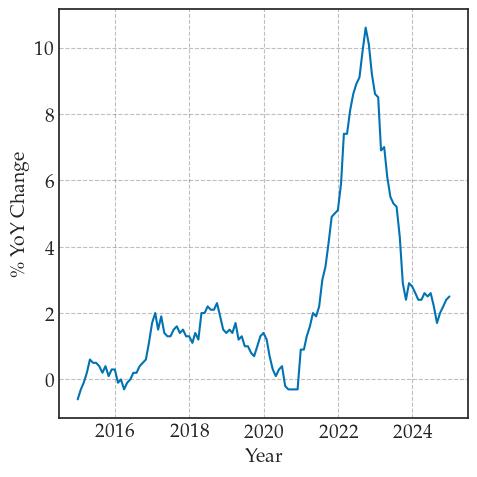

In [4]:

estat = Request('ESTAT')

# --- 1. Inflation data ---
inflation_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'CP00', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_inflation = inflation_resp.to_pandas().reset_index()
df_inflation['TIME_PERIOD'] = pd.to_datetime(df_inflation['TIME_PERIOD'])
df_inflation['value'] = df_inflation['value'].astype(float)

# --- 2. Energy share by quintile ---
energy_resp = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EU',
        'coicop': ['CP00', 'CP045', 'CP0722'],
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)
df_energy = energy_resp.to_pandas().reset_index()
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# --- 3. Energy prices ---
prices_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_prices = prices_resp.to_pandas().reset_index()
df_prices['TIME_PERIOD'] = pd.to_datetime(df_prices['TIME_PERIOD'])
df_prices['value'] = df_prices['value'].astype(float)

# --- Additional data: Energy contribution to inflation ---
contrib_resp = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_contrib = contrib_resp.to_pandas().reset_index()
df_contrib['TIME_PERIOD'] = pd.to_datetime(df_contrib['TIME_PERIOD'])
df_contrib['value'] = df_contrib['value'].astype(float)




# --- Modify Subplot 1 to include energy contribution ---

fig = plt.figure(figsize=(5, 5))

# Subplot 1: Inflation
ax1 = fig.add_subplot(111)
ax1.plot(df_inflation['TIME_PERIOD'], df_inflation['value'],  label='Overall Inflation')
# ax1.plot(df_contrib['TIME_PERIOD'], df_contrib['value'], color='tab:red', linestyle='--', label='Energy Contribution')
# ax1.set_title('(a) Inflation')
ax1.set_xlabel('Year')
ax1.set_ylabel(r'\% YoY Change')
# ax1.yaxis.set_label_coords(-0.15, 0.5)
# ax1.legend()



# # Subplot 3: Energy prices
# ax3 = fig.add_subplot(122)
# # ax3.plot(df_prices['TIME_PERIOD'], df_prices['value'], color='tab:blue')
# ax3.plot(df_contrib['TIME_PERIOD'], df_contrib['value'], color='tab:blue',  label='Energy Contribution')
# ax3.set_title('(b) Energy Contribution to Inflation')
# ax3.set_xlabel('Year')
# ax3.set_ylabel(r'\%-points ')
# ax3.yaxis.set_label_coords(-0.15, 0.5)

# # Final layout
# fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
fig.tight_layout()
if new_fig:  fig.savefig('plots_defence/inflation.png', dpi=300, bbox_inches='tight')



**Energy Contribution to infltion**

2025-08-11 12:30:30,523 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-08-11 12:30:30,640 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-08-11 12:30:30,730 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-08-11 12:30:31,000 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


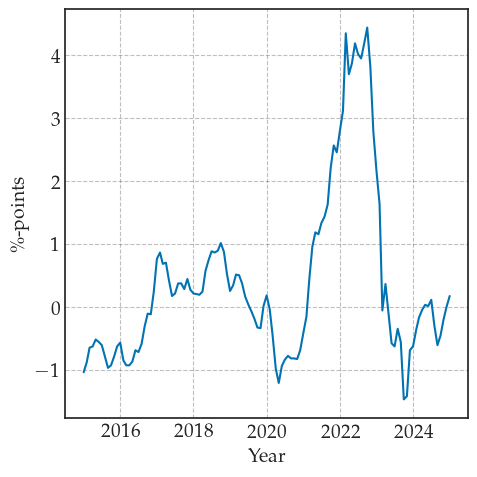

In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandasdmx import Request

estat = Request('ESTAT')

# --- 1. Inflation data ---
inflation_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'CP00', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_inflation = inflation_resp.to_pandas().reset_index()
df_inflation['TIME_PERIOD'] = pd.to_datetime(df_inflation['TIME_PERIOD'])
df_inflation['value'] = df_inflation['value'].astype(float)

# --- 2. Energy share by quintile ---
energy_resp = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EU',
        'coicop': ['CP00', 'CP045', 'CP0722'],
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)
df_energy = energy_resp.to_pandas().reset_index()
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# --- 3. Energy prices ---
prices_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_prices = prices_resp.to_pandas().reset_index()
df_prices['TIME_PERIOD'] = pd.to_datetime(df_prices['TIME_PERIOD'])
df_prices['value'] = df_prices['value'].astype(float)

# --- Additional data: Energy contribution to inflation ---
contrib_resp = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_contrib = contrib_resp.to_pandas().reset_index()
df_contrib['TIME_PERIOD'] = pd.to_datetime(df_contrib['TIME_PERIOD'])
df_contrib['value'] = df_contrib['value'].astype(float)

# --- Modify Subplot 1 to include energy contribution ---
fig = plt.figure(figsize=(5, 5))

# # Subplot 1: Inflation
# ax1 = fig.add_subplot(121)
# ax1.plot(df_inflation['TIME_PERIOD'], df_inflation['value'], color='tab:blue', label='Overall Inflation')
# # ax1.plot(df_contrib['TIME_PERIOD'], df_contrib['value'], color='tab:red', linestyle='--', label='Energy Contribution')
# ax1.set_title('(a) Inflation')
# ax1.set_xlabel('Year')
# ax1.set_ylabel(r'\% YoY Change')
# ax1.yaxis.set_label_coords(-0.15, 0.5)
# # ax1.legend()

# # Subplot 2: Energy expenditure share
# ax2 = fig.add_subplot(133)
# ax2.bar(df_pivot['quant_rank'], df_pivot['energy_share'], color='tab:blue')
# ax2.set_xticks([1, 2, 3, 4, 5])
# ax2.set_xticklabels([1, 2, 3, 4, 5])
# ax2.set_title('(c) Energy Expenditure Share')
# ax2.set_xlabel('Income Quintile')
# ax2.set_ylabel(r'\% of Expenditure')
# ax2.yaxis.set_label_coords(-0.15, 0.5)

# Subplot 3: Energy prices
ax3 = fig.add_subplot(111)
# ax3.plot(df_prices['TIME_PERIOD'], df_prices['value'], color='tab:blue')
# ax3.plot(df_contrib['TIME_PERIOD'], df_contrib['value'], color='tab:blue',  label='Energy Contribution')
ax3.plot(df_contrib['TIME_PERIOD'], df_contrib['value'],   label='Energy Contribution')
# ax3.set_title('(b) Energy Contribution to Inflation')
ax3.set_xlabel('Year')
ax3.set_ylabel(r'\%-points ')
# ax3.yaxis.set_label_coords(-0.15, 0.5)

# Final layout
# fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
fig.tight_layout()
if new_fig:  fig.savefig('plots_defence/inflation_energy_contribution.png', dpi=300, bbox_inches='tight')



**Inflation Inequality**

In [6]:
# a. Data 

path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL-1/Composition_COL_inequality.xlsx'

# Load the Excel file without headers
df = pd.read_excel(path, header=None, sheet_name='Sheet1')

# Drop the first row
df = df.iloc[1:].reset_index(drop=True)

# Set the second row as header
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)

# Rename and convert the date column
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%YM%m')

# # Add a collum with sum
df['Sum'] = df.iloc[:, 1:].sum(axis=1)


# Make sure dataframe is sorted by date
df = df.sort_values('Date').reset_index(drop=True)

In [85]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # --- a. Data ---------------------------------------------------------------
# path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL-1/Composition_COL_inequality.xlsx'

# df = pd.read_excel(path, header=None, sheet_name='Sheet1')
# df = df.iloc[1:].reset_index(drop=True)
# df.columns = df.iloc[0]
# df = df.drop(df.index[0]).reset_index(drop=True)

# df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
# df['Date'] = pd.to_datetime(df['Date'], format='%YM%m')

# # add total just in case you want to plot it later
# df['Sum'] = df.iloc[:, 1:].astype(float).sum(axis=1)

# # keep tidy
# df = df.sort_values('Date').reset_index(drop=True)


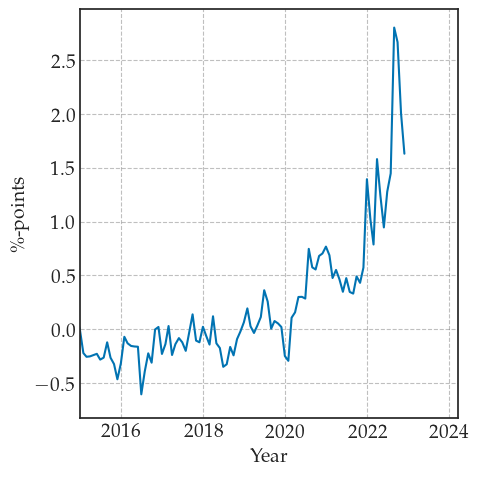

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# df.plot(x='Date', y=['sum'])

ax.plot(df['Date'], df['Sum'],  label='Total Contribution')

# ax.set_title('Cost of living inequality')
ax.set_ylabel(r'\%-points ')

ax.set_xlabel('Year')
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# ax.set_ylim(-2,5)
ax.set_xlim(pd.to_datetime('2015-01-01'))#, pd.to_datetime('2025-01-01'))

# every second year only year
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.tight_layout()
if new_fig:  fig.savefig('plots_defence/col_inequality.png', dpi=300, bbox_inches='tight')


# Note Difference in inflation rates between households in the top 20% and the bottom 20% of equivalized household income.

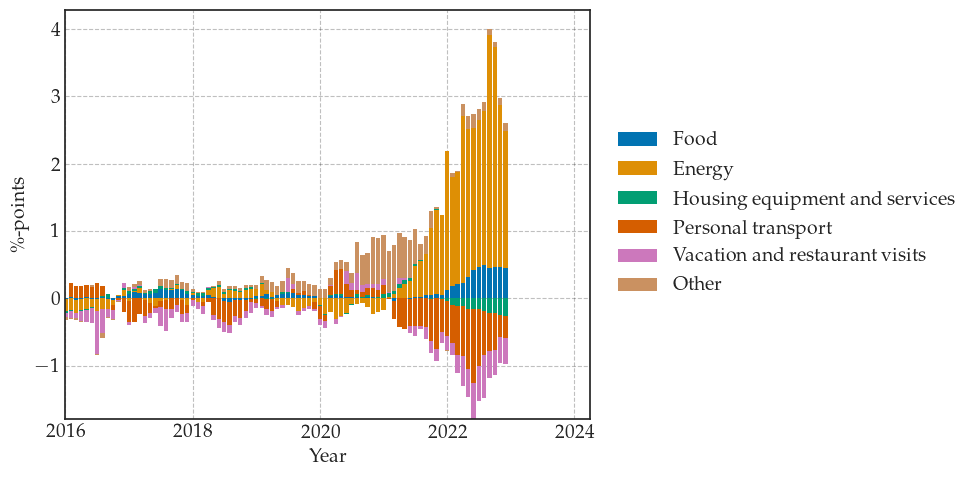

In [10]:

# categories to plot
cats = [c for c in df.columns if c not in ['Date', 'Sum']]

# use default matplotlib color cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# --- b. Figure -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))

x = df['Date']
bar_width = 25  # days

pos_stack = np.zeros(len(df))
neg_stack = np.zeros(len(df))

for i, cat in enumerate(cats):
    y = df[cat].astype(float).to_numpy()
    pos = np.where(y > 0, y, 0)
    neg = np.where(y < 0, y, 0)

    ax.bar(x, pos, width=bar_width, bottom=pos_stack,
           label=cat, color=color_cycle[i % len(color_cycle)])
    pos_stack += pos

    ax.bar(x, neg, width=bar_width, bottom=neg_stack,
           color=color_cycle[i % len(color_cycle)])
    neg_stack += neg


ax.set_ylabel(r'\%-points ')

# x axis
start = pd.Timestamp('2016-01-01')
end   = pd.Timestamp('2024-12-31')
ax.set_xlim(start)#, end)

# ax.xaxis.set_major_locator(mdates.YearLocator(2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


ax.set_xlabel('Year')

# legend outside right
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

fig.tight_layout()

if new_fig:  
    fig.savefig('plots_defence/col_inequality_dec.png', dpi=300, bbox_inches='tight')

